             IRE  DEGREE
0   1.091394e-10       1
1   4.365575e-11       2
2  -7.275958e-12       3
3   0.000000e+00       4
4   2.910383e-11       5
5   0.000000e+00       6
6   2.910383e-11       7
7   0.000000e+00       8
8  -2.910383e-11       9
9  -5.820766e-11      10
10  0.000000e+00      11
11 -5.820766e-11      12
12  2.910383e-11      13
13 -2.910383e-11      14
14 -2.910383e-11      15
15 -2.910383e-11      16
16  5.820766e-11      17
17 -5.820766e-11      18
18  0.000000e+00      19
19  5.820766e-11      20
           BIAS  DEGREE
0   1000.840897       1
1    976.645344       2
2     97.638845       3
3    102.899458       4
4     99.761942       5
5     99.995988       6
6    102.107374       7
7    104.870533       8
8    107.632098       9
9    119.631735      10
10   111.576237      11
11   175.640419      12
12   126.392050      13
13   198.068473      14
14   250.855063      15
15   264.237671      16
16   339.469769      17
17   347.247096      18
18   438.155766    

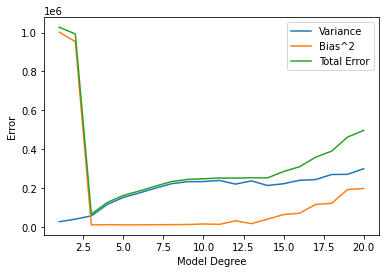

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
import pickle
from sklearn.metrics import mean_squared_error


train_file = open('data/train.pkl','rb');
test_file = open('data/test.pkl','rb');

train_data = pickle.load(train_file);
test_data = pickle.load(test_file);

X_train = train_data[:,np.newaxis,0];
y_train = train_data[:,np.newaxis,1];
X_test = test_data[:,np.newaxis,0];
y_test = test_data[:,np.newaxis,1];



num_examples = X_train.shape[0];
num_splits = 10;
max_degree = 20;
size_dataset = int(num_examples / num_splits);

model_predictions=[];

for j in range(1,max_degree+1):
    model_predictions.append([]);
    
for i in range(1,num_splits + 1):
    
    start = (i - 1) * size_dataset;
    end = i * size_dataset;
    
    X_train_part = X_train[start:end];
    y_train_part = y_train[start:end];
    
    for j in range(1,max_degree+1):
        model = linear_model.LinearRegression();
        poly_features = PolynomialFeatures(degree=j);
        X_poly = poly_features.fit_transform(X_train_part);
        model.fit(X_poly,y_train_part);
        
        y_predicted = model.predict(poly_features.fit_transform(X_test));
        model_predictions[j-1].append(y_predicted);
        
        
mean_bias_values = []
mean_variance_values = []
irreducible_error_values = [];    
total_error_values = [];

for i in range(0,max_degree):
    E_predictions = np.mean(model_predictions[i],axis=0);
    
    MSE = np.mean(np.square(np.subtract(model_predictions[i],y_test)),axis=1);
    mean_MSE = np.mean(MSE);
    
    variance = np.mean(np.square(np.subtract(model_predictions[i],E_predictions)),axis=1)
    mean_variance = np.mean(variance);
    mean_variance_values.append(mean_variance);
    
    bias = np.square(np.subtract(E_predictions,y_test));
    mean_bias = np.mean(bias);
    mean_bias_values.append(mean_bias);
    
    
    irreducible_error = mean_MSE - mean_bias - mean_variance;
    irreducible_error_values.append(irreducible_error);

    total_error_values.append(mean_bias + mean_variance + irreducible_error);
    
model_degree = [];
for i in range(1,max_degree+1):
    model_degree.append(i);
    
ire_arr = np.array([irreducible_error_values]).T
df_ire = pd.DataFrame(ire_arr,columns=['IRE'])
df_ire['DEGREE'] = pd.Series(np.array(model_degree));

bias_arr = np.array([mean_bias_values]).T
df_bias = pd.DataFrame(np.sqrt(bias_arr),columns=['BIAS'])
df_bias['DEGREE'] = pd.Series(np.array(model_degree));

variance_arr = np.array([mean_variance_values]).T
df_variance = pd.DataFrame(variance_arr,columns=['VARIANCE'])
df_variance['DEGREE'] = pd.Series(np.array(model_degree));

print(df_ire);
print(df_bias);
print(df_variance);

plt.xlabel('Model Degree');
plt.ylabel('Error');
plt.plot(model_degree,mean_variance_values,label='Variance');
plt.plot(model_degree,mean_bias_values,label='Bias^2');
plt.plot(model_degree,total_error_values,label='Total Error')
plt.legend();
plt.show()


In [1]:

# xarr = [-1,0,1,2,3,4,5,6,7,8,9,10];
# yarr = [];
# for xvalue in xarr:
#     yarr.append(xvalue**2 - xvalue - 2);
# print(yarr);
# plt.scatter(xarr,yarr);
# plt.show()

# testing_X=np.array(xarr);
# testing_y=np.array(yarr);

# df_testing = pd.DataFrame(testing_X,columns=['COL']);
# df_testing['Target'] = pd.Series(testing_y);
# testing_X = testing_X[:,np.newaxis]
# reg = linear_model.LinearRegression();
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(testing_X[:-10]);
# reg.fit(X_poly,testing_y[:-10]);
# testing_y_pred = reg.predict(poly.fit_transform(testing_X[-10:]))
# plt.scatter(testing_X[-10:],testing_y[-10:],color='black')
# plt.plot(testing_X[-10:],testing_y_pred)